In [ ]:
import pickle
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import glob, os
from torch.utils.data import Dataset
from skimage import io
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import pickle
import time
import torch.optim as optim
import seaborn as sns
from tqdm.notebook import trange, tqdm
%matplotlib inline

In [ ]:
!wget https://www.dropbox.com/s/nes12l1x7pehv46/train.tar.gz

--2020-11-12 06:26:03--  https://www.dropbox.com/s/nes12l1x7pehv46/train.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nes12l1x7pehv46/train.tar.gz [following]
--2020-11-12 06:26:03--  https://www.dropbox.com/s/raw/nes12l1x7pehv46/train.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9f28619a107800ec1a8516be76.dl.dropboxusercontent.com/cd/0/inline/BDC2Df7IKJgKLw8sLvOBYX7uefQvoocvPNTmCmimMVCKgrz_VMXzAxJNYOkC8262sr76fh3VDtTZId4er8YbWN3nKoPHKoRH6hRPzN9thpnYlLtXj3rGemXoJyQ6Sp4SNpQ/file# [following]
--2020-11-12 06:26:03--  https://uc9f28619a107800ec1a8516be76.dl.dropboxusercontent.com/cd/0/inline/BDC2Df7IKJgKLw8sLvOBYX7uefQvoocvPNTmCmimMVCKgrz_VMXzAxJNYOkC8262sr76fh3VDtTZId4er8YbWN3nKoPHKoRH6hRPzN9thpnYlLt

In [ ]:
!tar --gunzip --extract --verbose --file=train.tar.gz

Выходные данные были обрезаны до нескольких последних строк (5000).
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T05-03-23devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T07-56-43devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T13-59-25devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T07-55-13devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T13-04-48devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T07-03-06devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T12-01-11devID2.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T03-59-45devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T09-56-26devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T12-03-41devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T14-00-55devID2.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T12-03-11devID2.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T05

In [ ]:
!rm train.tar.gz

In [ ]:
with open('/content/index.pkl', 'rb') as f:
    data_index = pickle.load(f)

In [ ]:
data_index

In [ ]:
data = pd.DataFrame(data_index)
data.head()

,jpg_filename,lon,lat,mask_fname,mission,devID,observations_dt,observed_TCC
0,img-2019-12-11T10-02-37devID2.jpg,-10.783049,41.343315,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 10:00:00.000,4
1,img-2019-12-11T09-56-17devID2.jpg,-10.775720,41.359167,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 10:00:00.000,4
2,img-2019-12-11T10-04-17devID1.jpg,-10.784958,41.339135,AMK79/masks/mask-id1.png,AMK79,1,2019-12-11 10:00:00.000,4
3,img-2019-12-11T14-00-00devID2.jpg,-11.037792,40.761531,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 13:59:59.975,1
4,img-2019-12-11T12-58-20devID2.jpg,-10.973738,40.909492,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 12:59:59.980,1


In [ ]:
data.describe()

,lon,lat,devID,observed_TCC
count,92077.000000,92077.000000,92077.000000,92077.000000
mean,12.884987,3.641005,1.499995,5.008927
std,47.924996,23.667443,0.500003,2.998372
min,-52.703152,-44.215189,1.000000,0.000000
25%,-28.843466,-12.876762,1.000000,2.000000
50%,-9.265234,1.899143,1.000000,6.000000
75%,64.609930,22.735270,2.000000,8.000000
max,99.668979,44.957148,2.000000,8.000000


In [ ]:
len(data['observed_TCC'].unique())

9

In [ ]:
data['mission'].unique()

array(['AMK79', 'ABP42', 'AI52', 'AI49', 'ANS31'], dtype=object)

In [ ]:
data["lat"]

0        41.343315
1        41.359167
2        41.339135
3        40.761531
4        40.909492
           ...    
92072    33.830525
92073    33.476699
92074    33.886403
92075    33.476318
92076    33.834214
Name: lat, Length: 92077, dtype: float64

In [ ]:
os.mkdir('train')

In [ ]:
for mis in data['mission'].unique():
    dirs = []
    roott = '/content/{}/snapshots/'.format(mis)
    for dir, folder, file in os.walk(roott) :
        dirs.append(dir)

    for dir in dirs:
        for path in Path('{}'.format(dir)).glob('*.jpg'):
          path.replace(Path('/content/train') / path.name)

In [ ]:
!rm -rf "/content/ABP42"
!rm -rf "/content/AI49"
!rm -rf "/content/AI52"
!rm -rf "/content/AMK79"
!rm -rf "/content/ANS31"

In [ ]:
#folders = []
#files = []
#for mis in data['mission'].unique():
#    dirs = []
#    os.mkdir('train{}'.format(mis))
#
#    roott = '/content/{}/snapshots/'.format(mis)
#    for dir, folder, file in os.walk(roott):
#        dirs.append(dir)
#        #folders.append(folder)
#        #files.append(file)
#
#    for dir in dirs:
#        for path in Path('{}'.format(dir)).glob('*.jpg'):
#            path.replace(Path('/content/train{}'.format(mis)) / path.name)

In [ ]:
print(len(glob.glob('/content/train/*')))
assert(len(glob.glob('/content/train/*')) == len(data))
print("OK!")

92077
OK!


In [ ]:
#print(len(glob.glob('/content/trainABP42/*')))
#print(len(glob.glob('/content/trainAI49/*')))
#print(len(glob.glob('/content/trainAI52/*')))
#print(len(glob.glob('/content/trainAMK79/*')))
##print(len(glob.glob('/content/trainANS31/*')))
#print(len(glob.glob('/content/trainABP42/*')) 
#                    + len(glob.glob('/content/trainAI49/*')) 
#                    + len(glob.glob('/content/trainAI52/*'))
#                    + len(glob.glob('/content/trainAMK79/*')) 
#                    + len(glob.glob('/content/trainANS31/*'))
#                    )
#assert(len(data) == ( len(glob.glob('/content/trainABP42/*')) 
#                    + len(glob.glob('/content/trainAI49/*')) 
#                    + len(glob.glob('/content/trainAI52/*'))
#                    + len(glob.glob('/content/trainAMK79/*')) 
#                    + len(glob.glob('/content/trainANS31/*'))
#                    )
#)
#print("OK!")

In [ ]:
#split = np.random.rand(len(data)) < 0.8
#train_data_set = data[split]
#test_data_set = data[~split]
train_data_final = data[abs(data['lat']) <= 30]
test_data_final = data[abs(data['lat']) > 30]

train_data_set = train_data_final
test_data_set = test_data_final

In [ ]:
test_data_set['observed_TCC'].value_counts()

8    13057
0     3670
7     2758
4     1796
1     1646
6     1520
3     1192
5     1058
2      630
Name: observed_TCC, dtype: int64

In [ ]:
aug_5class = train_data_set[train_data_set['observed_TCC'] == 5]

In [ ]:
aug_5class = aug_5class[['jpg_filename', 'observed_TCC']]

In [ ]:
aug_5class.shape

(3427, 2)

In [ ]:
ABP42 = train_data_set[train_data_set['mission'] == 'ABP42']
AI49 = train_data_set[train_data_set['mission'] == 'AI49']
AI52 = train_data_set[train_data_set['mission'] == 'AI52']
AMK79 = train_data_set[train_data_set['mission'] == 'AMK79']
ANS31 = train_data_set[train_data_set['mission'] == 'ANS31']

In [ ]:
ABP42_data_sets = ABP42[['jpg_filename', 'observed_TCC']]
AI49_data_sets  = AI49[['jpg_filename', 'observed_TCC']]
AI52_data_sets  = AI52[['jpg_filename', 'observed_TCC']]
AMK79_data_sets = AMK79[['jpg_filename', 'observed_TCC']]
ANS31_data_sets = ANS31[['jpg_filename', 'observed_TCC']]

In [ ]:
print(ABP42_data_sets.shape)
print(AI49_data_sets.shape)
print(AI52_data_sets.shape)
print(AMK79_data_sets.shape)
print(ANS31_data_sets.shape)
print(ABP42_data_sets.shape[0] + AI49_data_sets.shape[0] +
      AI52_data_sets.shape[0] + AMK79_data_sets.shape[0] + 
      ANS31_data_sets.shape[0])
assert(len(train_data_set) ==(ABP42_data_sets.shape[0]+AI49_data_sets.shape[0]+
      AI52_data_sets.shape[0]+AMK79_data_sets.shape[0]+
      ANS31_data_sets.shape[0]))
print("ok!")

(28383, 2)
(0, 2)
(17142, 2)
(13274, 2)
(5951, 2)
64750
ok!


In [ ]:
train = train_data_set[['jpg_filename', 'observed_TCC']]
test = test_data_set[['jpg_filename', 'observed_TCC']]

In [ ]:
train_full = train

In [ ]:
train_al = train[train['observed_TCC']!=8]

In [ ]:
train_8class = train[train['observed_TCC'] == 8]

In [ ]:
train_8class_split =  train_8class[3000:9000]

In [136]:
train_8class_split.shape
train_al.shape

(44518, 2)

In [138]:
train = train_al.append(train_8class_split, ignore_index=True)
train.shape

(50518, 2)

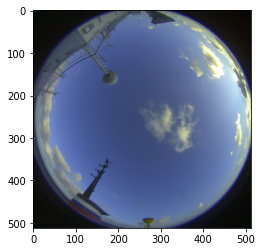

In [139]:
img = plt.imread("/content/train/img-2019-12-11T08-57-56devID1.jpg")
plt.imshow(img)
plt.show()

In [140]:
print(train.shape)
print(test.shape)
print(train.shape[0] + test.shape[0])
assert(data.shape[0] == train.shape[0] + test.shape[0])
print("OK!")

(50518, 2)
(27327, 2)
77845


AttributeError: ignored

In [141]:
class OceanDataset(Dataset) :
  def __init__(self, meta_data, root_dir, transforms = None):
      self.annotations = meta_data
      self.root_dir = root_dir
      self.transforms = transforms
  
  def __len__(self) :
      return len(self.annotations)
  
  def __getitem__(self, index) :
      img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
      image = io.imread(img_path)
      y_label = torch.tensor(int(self.annotations.iloc[index, 1]))
      
      if self.transforms:
          image = self.transforms(image)
        
      
      return (image, y_label)

In [142]:
aug5_color_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.CenterCrop(512),
    torchvision.transforms.ColorJitter(hue=.06, saturation=.06),
    #torchvision.transforms.RandomHorizontalFlip(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

aug5_flip_transform = transforms.Compose([
    transforms.ToTensor(),
    torchvision.transforms.RandomHorizontalFlip(),
    #transforms.CenterCrop(512),
    #torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

aug5_crop_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.CenterCrop(512),
    #torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    #torchvision.transforms.RandomHorizontalFlip(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
aug5_norm_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.CenterCrop(512),
    #torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    #torchvision.transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

aug_transform = transforms.Compose([
    transforms.ToTensor(),
    torchvision.transforms.RandomHorizontalFlip(),
    #transforms.CenterCrop(512),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.CenterCrop(512),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.CenterCrop(224),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [143]:
#augmentation по экспедициям
ABP42_aug = OceanDataset(meta_data = ABP42_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AI49_aug = OceanDataset(meta_data  = AI49_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AI52_aug = OceanDataset(meta_data  = AI52_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AMK79_aug = OceanDataset(meta_data = AMK79_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
ANS31_aug = OceanDataset(meta_data = ANS31_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
aug_norm_5class_transform = OceanDataset(meta_data = aug_5class, root_dir = '/content/train/',
                       transforms  = aug5_norm_transform)
aug_crop_5class_transform = OceanDataset(meta_data = aug_5class, root_dir = '/content/train/',
                       transforms  = aug5_crop_transform)
aug_flip_5class_transform = OceanDataset(meta_data = aug_5class, root_dir = '/content/train/',
                       transforms  = aug5_flip_transform)
aug_color_5class_transform = OceanDataset(meta_data = aug_5class, root_dir = '/content/train/',
                       transforms  = aug5_color_transform)

In [144]:
train_data = OceanDataset(meta_data = train, root_dir = '/content/train/',
                       transforms = train_transform)

In [145]:
train_set = torch.utils.data.ConcatDataset((train_data, ANS31_aug))
train_set_class5 = torch.utils.data.ConcatDataset((train_set, aug_color_5class_transform))
train_set_class5 = torch.utils.data.ConcatDataset((train_set_class5, aug_norm_5class_transform))
train_set_class5 = torch.utils.data.ConcatDataset((train_set_class5, aug_flip_5class_transform))
train_set_class5 = torch.utils.data.ConcatDataset((train_set_class5, aug_crop_5class_transform))
print(len(train_data))
print(len(ANS31_aug))
print(len(train_set_class5))

50518
5951
70177


In [146]:
train_set.__len__()

56469

In [147]:
test_set = OceanDataset(meta_data = test, root_dir = '/content/train/',
                       transforms = test_transform)

In [148]:
print(len(ABP42_data_sets))
print(len(AI49_data_sets))
print(len(AI52_data_sets))
print(len(AMK79_data_sets))
print(len(ANS31_data_sets))
print(len(ABP42_data_sets) + len(AI49_data_sets) + len(AI52_data_sets) + len(AMK79_data_sets) + len(ANS31_data_sets))

assert(len(ABP42_data_sets) == ABP42_aug.__len__())
assert(len(AI49_data_sets) == AI49_aug.__len__())
assert(len(AI52_data_sets) == AI52_aug.__len__())
assert(len(AMK79_data_sets) == AMK79_aug.__len__())
assert(len(ANS31_data_sets) == ANS31_aug.__len__())
assert((len(ABP42_data_sets) 
        + len(AI49_data_sets) 
        + len(AI52_data_sets)
        + len(AMK79_data_sets)
        + len(ANS31_data_sets))
        == len(train)
)
print("ok!")

28383
0
17142
13274
5951
64750


AssertionError: ignored

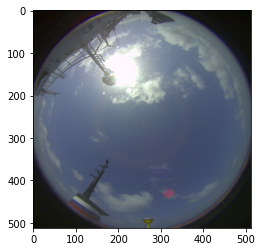

In [149]:
plt.imshow(train_set_class5[1][0].permute(1, 2, 0))

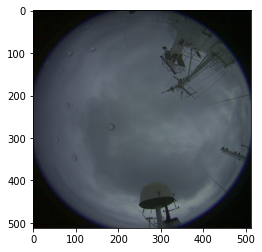

In [150]:
plt.imshow(ANS31_aug[1][0].permute(1, 2, 0))

In [151]:
train_loader = DataLoader(train_set_class5, batch_size = 16, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 16, shuffle = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


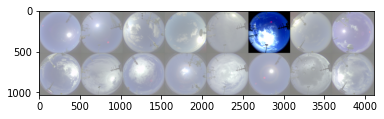

In [152]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)

images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels


## ResNet

In [ ]:
from torchvision import datasets, transforms, models

In [ ]:
model_Resnet = models.resnet50(pretrained=True)
model_Resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
import torch.nn as nn
from collections import OrderedDict

classifier = nn.Sequential(
  nn.Linear(in_features=2048, out_features=1024),
  nn.LeakyReLU(),
  nn.Dropout(p=0.2),
  nn.Linear(in_features=1024, out_features=512),
  nn.LeakyReLU(),
  nn.Dropout(p=0.3),
  nn.Linear(in_features=512, out_features=9) 
)
    
model_Resnet.fc = classifier
model_Resnet.fc

Sequential(
  (0): Linear(in_features=2048, out_features=1024, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=1024, out_features=512, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=512, out_features=9, bias=True)
)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
#optimizer = optim.Adam(model_Resnet.fc.parameters(), lr=0.0001)
optimizer = optim.SGD(model_Resnet.parameters(), lr=0.001, momentum=0.9)
#gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_Resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
loss_history_train = []
epochs = 3

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    start_time = time.time()


    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        output = model_Resnet(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        end_time = time.time()
        time_taken = end_time - start_time

        running_loss += loss.item()
        
        if i % 200 == 199: 
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            print('Time:',time_taken)
            loss_history_train.append(running_loss)
            running_loss = 0.0

print('Finished Training of ResNet')

[1,   200] loss: 1.910
Time: 127.78462290763855
[1,   400] loss: 1.472
Time: 256.0409140586853
[1,   600] loss: 1.230
Time: 385.7563533782959
[1,   800] loss: 1.066
Time: 514.4961023330688
[1,  1000] loss: 0.989
Time: 645.024614572525
[1,  1200] loss: 0.936
Time: 772.373626947403
[1,  1400] loss: 0.881
Time: 900.6356241703033
[1,  1600] loss: 0.813
Time: 1028.8621428012848
[1,  1800] loss: 0.760
Time: 1157.37895321846
[1,  2000] loss: 0.739
Time: 1286.1389327049255
[1,  2200] loss: 0.682
Time: 1413.9855439662933
[1,  2400] loss: 0.655
Time: 1541.9038264751434
[1,  2600] loss: 0.590
Time: 1672.833377122879
[1,  2800] loss: 0.576
Time: 1799.6659169197083
[1,  3000] loss: 0.570
Time: 1928.4699306488037
[1,  3200] loss: 0.537
Time: 2056.354083776474
[1,  3400] loss: 0.526
Time: 2183.8922424316406
[1,  3600] loss: 0.509
Time: 2310.922560453415
[1,  3800] loss: 0.447
Time: 2440.2431740760803
[1,  4000] loss: 0.451
Time: 2567.3675768375397
[1,  4200] loss: 0.457
Time: 2695.120701789856
[1,  4

##Alex_Net

In [153]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [154]:
model.classifier[1] = torch.nn.Linear(9216, 4096)
model.classifier[4] = torch.nn.Linear(4096, 1024)
model.classifier[6] = torch.nn.Linear(1024, 9)

In [155]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [156]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [157]:
print(device)

cuda:0


In [158]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [159]:
criterion = torch.nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [160]:
loss_history_train = []
epochs = 1
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0

    start_time = time.time()

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        end_time = time.time()
        time_taken = end_time - start_time

        running_loss += loss.item()
        
        if i % 200 == 199: 
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            print('Time:',time_taken)
            loss_history_train.append(running_loss)
            running_loss = 0.0


print('Finished Training of AlexNet')

[1,   200] loss: 1.413
Time: 63.150617837905884
[1,   400] loss: 1.050
Time: 126.79170274734497
[1,   600] loss: 0.829
Time: 190.02351331710815
[1,   800] loss: 0.702
Time: 252.29853320121765
[1,  1000] loss: 0.557
Time: 314.76565742492676
[1,  1200] loss: 0.469
Time: 377.75816798210144
[1,  1400] loss: 0.410
Time: 440.8526258468628
[1,  1600] loss: 0.346
Time: 503.31789207458496
[1,  1800] loss: 0.290
Time: 565.2502586841583
[1,  2000] loss: 0.257
Time: 627.9104964733124
[1,  2200] loss: 0.207
Time: 688.9349603652954
[1,  2400] loss: 0.192
Time: 754.3849713802338
[1,  2600] loss: 0.162
Time: 818.14408659935
[1,  2800] loss: 0.169
Time: 881.8290021419525
[1,  3000] loss: 0.129
Time: 943.9012207984924
[1,  3200] loss: 0.131
Time: 1006.0054638385773
[1,  3400] loss: 0.122
Time: 1068.8074796199799


KeyboardInterrupt: ignored

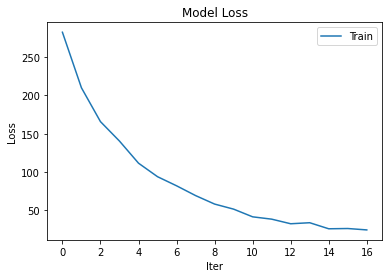

In [161]:
plt.plot(loss_history_train)
plt.title("Model Loss")
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

In [164]:
correct = 0
total = 0

with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100 * correct / total)

47.835474073260876


In [ ]:
correct = 0
total = 0
predict_set = None
with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1) 

        total += labels.size(0)
        correct += (abs(labels - predicted) <= 1).sum().item()


print(100 * correct / total)

86.35781461558166


In [162]:
correct = 0
total = 0
predict_set = None
count = 0
with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1)
        print(torch.max(predict_set.data, 1))
        print("--------")
        print(labels)
        print("\n")
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if count == 2 :
            break
        count += 1


print(100 * correct / total)

torch.return_types.max(
values=tensor([13.7105, 14.7422,  9.9462,  6.8033,  7.2119, 13.1815, 12.7382, 10.5345,
         3.9511,  9.2167,  5.8734,  3.7607, 13.1686, 12.0552,  5.1106,  6.3244],
       device='cuda:0'),
indices=tensor([7, 8, 7, 7, 8, 8, 0, 8, 7, 8, 5, 2, 0, 7, 4, 2], device='cuda:0'))
--------
tensor([8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 0, 0, 8, 8, 1], device='cuda:0')


torch.return_types.max(
values=tensor([10.7400, 11.0032,  4.8422,  7.6247,  7.9510,  7.0328,  4.8222,  5.7741,
         9.4773, 11.2166,  4.4975, 10.6560, 11.0821, 12.9905,  5.0550,  6.5110],
       device='cuda:0'),
indices=tensor([6, 8, 7, 3, 7, 7, 4, 6, 6, 8, 4, 7, 8, 0, 4, 3], device='cuda:0'))
--------
tensor([6, 7, 8, 1, 8, 8, 5, 4, 3, 8, 4, 8, 8, 0, 3, 7], device='cuda:0')


torch.return_types.max(
values=tensor([ 4.2246, 12.7851, 15.4354,  4.4057,  5.0309,  9.1209,  5.1936, 12.3240,
         8.3032, 17.9295, 13.4235,  8.8278,  7.6907, 13.7019, 13.3340, 13.9907],
       device='cuda:0'),
indices=tenso

In [163]:
class_correct = list(0. for i in range(9))
class_total = list(0. for i in range(9))

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_Resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()

        for i in range(labels.shape[0]):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(9):
    print('Accuracy of %5s : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 80 %
Accuracy of     1 : 43 %
Accuracy of     2 : 39 %
Accuracy of     3 :  8 %
Accuracy of     4 : 59 %
Accuracy of     5 : 19 %
Accuracy of     6 : 30 %
Accuracy of     7 : 21 %
Accuracy of     8 : 79 %
